<a href="https://colab.research.google.com/github/claytonchagas/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept/blob/main/exp3_2_power_ast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [95.2 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  

In [2]:

!sudo apt-get install python3.9

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9 python3.9-minimal
0 upgraded, 4 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,917 kB of archives.
After this operation, 19.1 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 libpython3.9-minimal amd64 3.9.15-1+bionic1 [805 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 python3.9-minimal amd64 3.9.15-1+bionic1 [1,938 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main am

In [3]:
!python3.9 -V
!which python3.9

Python 3.9.15
/usr/bin/python3.9


#**i. Colab hardware and software specs:**
- n1-highmem-2 instance

- 2vCPU @ 2.3GHz

- 13GB RAM

- 100GB Free Space

- idle cut-off 90 minutes

- maximum lifetime 12 hours

In [4]:
# Colab hardware info (processor and memory):
# !cat /proc/cpuinfo
# !cat /proc/memoinfo
# !lscpu
!lscpu | egrep 'Model name|Socket|Thread|NUMA|CPU\(s\)'
print("---------------------------------")
!free -m

CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Socket(s):           1
NUMA node(s):        1
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
NUMA node0 CPU(s):   0,1
---------------------------------
              total        used        free      shared  buff/cache   available
Mem:          12985         820       10112           1        2052       11941
Swap:             0           0           0


In [5]:
# Colab SO structure and version
!ls -a
print("---------------------------------")
!ls -l /
print("---------------------------------")
!lsb_release -a

.  ..  .config	sample_data
---------------------------------
total 112
drwxr-xr-x   1 root root  4096 Oct 18 13:27 bin
drwxr-xr-x   2 root root  4096 Apr 24  2018 boot
drwxr-xr-x   1 root root  4096 Oct 18 13:36 content
drwxr-xr-x   1 root root  4096 Oct 18 13:49 datalab
drwxr-xr-x   5 root root   360 Oct 19 19:50 dev
drwxr-xr-x   1 root root  4096 Oct 19 19:50 etc
drwxr-xr-x   2 root root  4096 Apr 24  2018 home
drwxr-xr-x   1 root root  4096 Oct 18 13:29 lib
drwxr-xr-x   2 root root  4096 Oct 18 13:24 lib32
drwxr-xr-x   2 root root  4096 May 31 11:55 lib64
drwxr-xr-x   2 root root  4096 May 31 11:54 media
drwxr-xr-x   2 root root  4096 May 31 11:54 mnt
-rw-r--r--   1 root root 16047 Jul 11 20:48 NGC-DL-CONTAINER-LICENSE
drwxr-xr-x   1 root root  4096 Oct 18 13:50 opt
dr-xr-xr-x 185 root root     0 Oct 19 19:50 proc
drwxr-xr-x  14 root root  4096 Oct 18 13:30 python-apt
drwx------   1 root root  4096 Oct 18 13:50 root
drwxr-xr-x   1 root root  4096 Oct 18 13:27 run
drwxr-xr-x   1 root

#**ii. Cloning IntPy repository:**
- https://github.com/claytonchagas/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept 

In [6]:
!git clone https://github.com/claytonchagas/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept

Cloning into '1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 54 (delta 14), reused 26 (delta 4), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [7]:
%cd 1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept/
!ls -a

/content/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept
.			     exp3_power.py		exp9_vince_sim.py
..			     exp4_quicksort_fixed.py	.git
colabs			     exp5_quicksort_random.py	README.md
exp10_qho-2-electrons	     exp6_heat_distribution_lu	stats_colab.py
exp1_fibonacci_recursive.py  exp7_heap_permutation.py
exp2_fibonacci_iterative.py  exp8_digital_rads


- https://github.com/claytonchagas/intpy_dev.git

In [8]:
!git clone https://github.com/claytonchagas/intpy_dev.git

Cloning into 'intpy_dev'...
remote: Enumerating objects: 969, done.
remote: Total 969 (delta 0), reused 0 (delta 0), pack-reused 969
Receiving objects: 100% (969/969), 24.63 MiB | 16.31 MiB/s, done.
Resolving deltas: 100% (693/693), done.


In [9]:
!cp -r intpy_dev/intpy/ ./
!ls -a

.			     exp3_power.py		exp9_vince_sim.py
..			     exp4_quicksort_fixed.py	.git
colabs			     exp5_quicksort_random.py	intpy
exp10_qho-2-electrons	     exp6_heat_distribution_lu	intpy_dev
exp1_fibonacci_recursive.py  exp7_heap_permutation.py	README.md
exp2_fibonacci_iterative.py  exp8_digital_rads		stats_colab.py


In [10]:
!git branch
print("---------------------------------")
#!git log --pretty=oneline --abbrev-commit
#!git log --all --decorate --oneline --graph 

* main
---------------------------------


#**iii. Power's evolutions and cutoff by approach**

- Evaluating recursive power code and its cutoff by approach

In [11]:
!ls -a
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output_iii.dat
print("--no-cache execution")
#1..327
!for i in {1..300}; do python3.9 exp3_power.py 1 $i --no-cache >> output_iii.dat; rm -rf .intpy; done
print("done!")
print("only intra cache")
!for i in {1..300}; do python3.9 exp3_power.py 1 $i -v v01x >> output_iii.dat; rm -rf .intpy; done
print("done!")
print("full cache")
!for i in {1..300}; do python3.9 exp3_power.py 1 $i -v v01x >> output_iii.dat; done
print("done!")

.			     exp3_power.py		exp9_vince_sim.py
..			     exp4_quicksort_fixed.py	.git
colabs			     exp5_quicksort_random.py	intpy
exp10_qho-2-electrons	     exp6_heat_distribution_lu	intpy_dev
exp1_fibonacci_recursive.py  exp7_heap_permutation.py	README.md
exp2_fibonacci_iterative.py  exp8_digital_rads		stats_colab.py
---------------------------------
Cleaning up cache
--no-cache execution
done!
only intra cache
done!
full cache
done!


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 2e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 2e-05, 1e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 3e-05, 3e-05, 3e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 3e-05, 3e-05, 4e-05, 3e-05, 3e-05, 3e-05, 3e-05, 3e-05, 5e-05, 3e-05, 3e-05, 3e-05, 4e-05, 4e-05, 3e-05, 3e-05, 3e-05, 3e-05, 5e-05, 3e-05, 3e-05, 3e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 4e-05, 5e-05, 5e-05, 4e-05, 4e-05, 4e-05, 5e-05, 5e-05, 5e-05, 6e-05, 6e-05, 6e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 5e-05, 6e-05, 7e-05, 8e-05, 6e-05, 6e-05, 9e-05, 6e-05, 0.00011, 6e-05, 6e-05, 6e-05, 7e-05, 7e-05, 8e-05, 7e-05, 8e-05, 7e-05, 8e-05, 7e-05, 7e-05, 8e-05, 0.00033, 7e-05, 7e-05, 0.0001, 7e-05

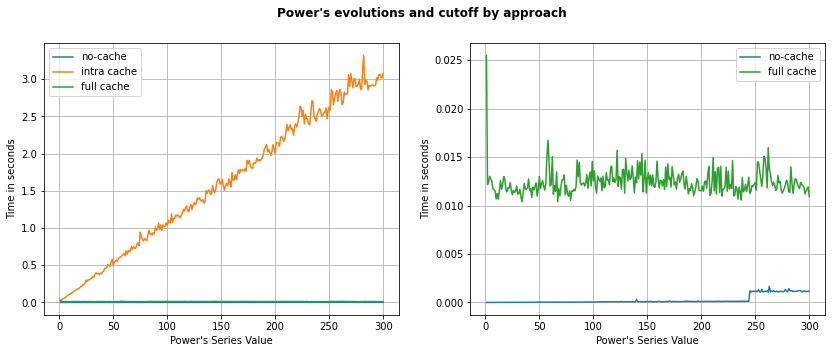

In [12]:
import matplotlib.pyplot as plt
import numpy as np

f1 = open("output_iii.dat", "r")
data1 = []
dataf1 = []
for x in f1.readlines()[3:1200:4]:
  data1.append(float(x))
f1.close()
for datas1 in data1:
  dataf1.append(round(datas1, 5))
print(dataf1)

f2 = open("output_iii.dat", "r")
data2 = []
dataf2 = []
for x in f2.readlines()[1203:2400:4]:
  data2.append(float(x))
f2.close()
for datas2 in data2:
  dataf2.append(round(datas2, 5))
print(dataf2)

f3 = open("output_iii.dat", "r")
data3 = []
dataf3 = []
for x in f3.readlines()[2403:3600:4]:
  data3.append(float(x))
f3.close()
for datas3 in data3:
  dataf3.append(round(datas3, 5))
print(dataf3)

x = np.arange(1, 301)

#plt.style.use('classic')

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(14)
fig.suptitle("Power's evolutions and cutoff by approach", fontweight='bold')
ax1.plot(x, dataf1, "tab:blue", label="no-cache")
ax1.plot(x, dataf2, "tab:orange", label="intra cache")
ax1.plot(x, dataf3, "tab:green", label="full cache")
#ax1.set_title("Power's evolutions and cutoff by approach")
ax1.set_xlabel("Power's Series Value")
ax1.set_ylabel("Time in seconds")
ax1.grid()
lex = ax1.legend()

ax2.plot(x, dataf1, "tab:blue", label="no-cache")
ax2.plot(x, dataf3, "tab:green", label="full cache")
#ax2.set_title("Power's evolutions and cutoff by approach")
ax2.set_xlabel("Power's Series Value")
ax2.set_ylabel("Time in seconds")
ax2.grid()
lex = ax2.legend()

plt.show()

#**iv. Power 1 ^ 300, 150 and 75 recursive, three mixed trials**

- Evaluating recursive power code, input 300, 150, and 75, three trials and plot.
- First trial: inputs: 1 ^ 300, 150 and 75, no inter-cache (baseline).
- Second trial: with inter and intra-cache, inputs: 1 ^ 300, 150 and 75, analyzing the cache's behavior with different inputs.
- Third trial: with inter and intra-cache, inputs: 1 ^ 75, 150 and 300, analyzing the cache's behavior with different inputs, in a different order of the previous running.

In [13]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output_iv.dat
print("First running, Power 1^300: value and time in sec")
!python3.9 exp3_power.py 1 300 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running, Power 1^150: value and time in sec")
!python3.9 exp3_power.py 1 150 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running, Power 1^75: value and time in sec")
!python3.9 exp3_power.py 1 75 -v v01x | tee -a output_iv.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Power 1^300: value and time in sec
['v01x']
False
1
3.2819580730000553
---------------------------------
Cleaning up cache
Second running, Power 1^150: value and time in sec
['v01x']
False
1
1.6408799519999775
---------------------------------
Cleaning up cache
Third running, Power 1^75: value and time in sec
['v01x']
False
1
0.8110411230001091
---------------------------------


- Second trial: with inter and intra-cache, inputs: 1 ^ 300, 150 and 75.

In [14]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("First running, Power 1^300: value and time in sec")
!python3.9 exp3_power.py 1 300 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Second running, Power 1^150: value and time in sec")
!python3.9 exp3_power.py 1 150 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Third running, Power 1^75: value and time in sec")
!python3.9 exp3_power.py 1 75 -v v01x | tee -a output_iv.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Power 1^300: value and time in sec
['v01x']
False
1
3.2158108169999196
---------------------------------
Second running, Power 1^150: value and time in sec
['v01x']
False
1
0.0017845820000275125
---------------------------------
Third running, Power 1^75: value and time in sec
['v01x']
False
1
0.0018291540000063833
---------------------------------


- Third trial: with inter and intra-cache, inputs: 1 ^ 75, 150 and 300.

In [15]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("First running, Power 1^75: value and time in sec")
!python3.9 exp3_power.py 1 75 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Second running, Power 1^150: value and time in sec")
!python3.9 exp3_power.py 1 150 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Third running, Power 1^300: value and time in sec")
!python3.9 exp3_power.py 1 300 -v v01x | tee -a output_iv.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Power 1^75: value and time in sec
['v01x']
False
1
0.7514898750000611
---------------------------------
Second running, Power 1^150: value and time in sec
['v01x']
False
1
0.8007507600000281
---------------------------------
Third running, Power 1^300: value and time in sec
['v01x']
False
1
1.568808980999961
---------------------------------


- Plotting the comparison: first graph.

[3.281958, 1.64088, 0.811041, 3.215811, 0.001785, 0.001829, 0.75149, 0.800751, 1.568809]
[3.281958, 3.215811, 1.568809]
[1.64088, 0.001785, 0.800751]
[0.811041, 0.001829, 0.75149]


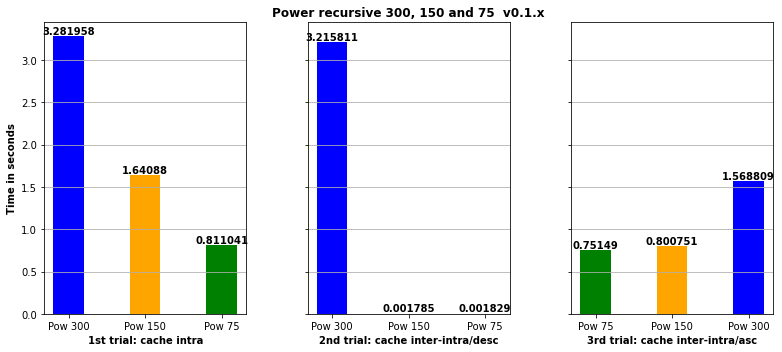

In [16]:
import numpy as np

f4 = open("output_iv.dat", "r")
pow300 = []
pow150 = []
pow75 = []
data4 = []
dataf4 = []
for x in f4.readlines()[3::4]:
  data4.append(float(x))
f4.close()

for datas4 in data4:
  dataf4.append(round(datas4, 6))

print(dataf4)

pow327 = [dataf4[0], dataf4[3], dataf4[8]]
print(pow327)

pow164 = [dataf4[1], dataf4[4], dataf4[7]]
print(pow164)

pow82 = [dataf4[2], dataf4[5], dataf4[6]]
print(pow82)

running3to5 = ['1st trial: cache intra', '2nd trial: cache inter-intra/desc', '3rd trial: cache inter-intra/asc']

y = np.arange(len(running3to5))
width = 0.40

z = ['Pow 300', 'Pow 150', 'Pow 75']
list_color_z = ['blue', 'orange', 'green']

zr = ['Pow 75', 'Pow 150', 'Pow 300']
list_color_zr = ['green', 'orange', 'blue']

t1=[dataf4[0], dataf4[1], dataf4[2]]
t2=[dataf4[3], dataf4[4], dataf4[5]]
t3=[dataf4[6], dataf4[7], dataf4[8]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(11,5))
rects1 = ax1.bar(z, t1,width, label='1st trial', color=list_color_z)
rects2 = ax2.bar(z, t2, width, label='2nd trial', color=list_color_z)
rects3 = ax3.bar(zr, t3, width, label='3rd trial', color=list_color_zr)

ax1.set_ylabel('Time in seconds', fontweight='bold')
ax1.set_xlabel('1st trial: cache intra', fontweight='bold')
ax2.set_xlabel('2nd trial: cache inter-intra/desc', fontweight='bold')
ax3.set_xlabel('3rd trial: cache inter-intra/asc', fontweight='bold')

ax2.set_title('Power recursive 300, 150 and 75  v0.1.x', fontweight='bold')

for index, datas in enumerate(t1):
  ax1.text(x=index, y=datas, s=t1[index], ha = 'center', va = 'bottom', fontweight='bold')

for index, datas in enumerate(t2):
  ax2.text(x=index, y=datas, s=t2[index], ha = 'center', va = 'bottom', fontweight='bold')

for index, datas in enumerate(t3):
  ax3.text(x=index, y=datas, s=t3[index], ha = 'center', va = 'bottom', fontweight='bold')

ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')

fig.tight_layout()
plt.savefig('chart_iv_pow_75_150_300_v01x.png')
plt.show()

#**1. Fast execution, all versions (v0.1.x and from v0.2.1.x to v0.2.7.x)**

##**1.1 Fast execution: only intra-cache**

###**1.1.1 Fast execution: only intra-cache => experiment's executions**

In [17]:
!rm -rf .intpy;\
rm -rf stats_intra.dat;\
echo "IntPy only intra-cache";\
experimento=exp3_power.py;\
param1=1;\
param2=300;\
echo "Experiment: $experimento";\
echo "Params: $param1 $param2";\
for i in "--no-cache" "v01x" "v021x" "v022x" "v023x" "v024x" "v025x" "v026x" "v027x";\
    do rm -rf output_intra_$i.dat;\
    rm -rf .intpy;\
    echo "---------------------------------";\
    echo "IntPy version $i";\
    for j in {1..5};\
        do echo "Execution $j";\
        rm -rf .intpy;\
        if [ "$i" = "--no-cache" ]; then python3.9 $experimento $param1 $param2 $i >> output_intra_$i.dat;\
        else python3.9 $experimento $param1 $param2 -v $i >> output_intra_$i.dat;\
        fi;\
        echo "Done execution $j";\
    done;\
    echo "Done IntPy version $i";\
done;\
echo "---------------------------------";\
echo "---------------------------------";\
echo "Statistics evaluation:";\
for k in "--no-cache" "v01x" "v021x" "v022x" "v023x" "v024x" "v025x" "v026x" "v027x";\
        do echo "Statistics version $k" >> stats_intra.dat;\
        echo "Statistics version $k";\
        python3.9 stats_colab.py output_intra_$k.dat;\
        python3.9 stats_colab.py output_intra_$k.dat >> stats_intra.dat;\
        echo "---------------------------------";\
done;\

IntPy only intra-cache
Experiment: exp3_power.py
Params: 1 300
---------------------------------
IntPy version --no-cache
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version --no-cache
---------------------------------
IntPy version v01x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v01x
---------------------------------
IntPy version v021x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v021x
---------------------------------
IntPy version v022x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v022x
---------------------------------

###**1.1.2 Fast execution: only intra-cache => charts generation**


In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

versions = ['--no-cache', 'v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:pink']
filev = "f_intra_"
data = "data_intra_"
dataf = "dataf_intra_"

for i, j in zip(versions, colors):
    filev_version = filev+i
    data_version = data+i
    dataf_version = dataf+i

    file_intra = open("output_intra_"+i+".dat", "r")
    data_intra = []
    dataf_intra = []
    for x in file_intra.readlines()[3::4]:
        data_intra.append(float(x))
    file_intra.close()
    for y in data_intra:
        dataf_intra.append(round(y, 5))
    print(i+": ",dataf_intra)
    running1_1 = ['1st', '2nd', '3rd', '4th', '5th']
 
    plt.figure(figsize = (10, 5))
    plt.bar(running1_1, dataf_intra, color =j, width = 0.4)
    plt.grid(axis='y')

    for index, datas in enumerate(dataf_intra):
        plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

    plt.xlabel("Running only with intra cache "+i, fontweight='bold')
    plt.ylabel("Time in seconds", fontweight='bold')
    plt.title("Chart "+i+" intra - Power 1^300 recursive - with intra cache, no inter cache - IntPy "+i+" version", fontweight='bold')
    plt.savefig("chart_intra_"+i+".png")
    plt.close()
    #plt.show()

--no-cache:  [0.00118, 0.00114, 0.00113, 0.00124, 0.0017]
v01x:  [3.16954, 3.12628, 3.03714, 3.10624, 3.07307]
v021x:  [0.08108, 0.0872, 0.08664, 0.08999, 0.09108]
v022x:  [0.08154, 0.07576, 0.08461, 0.0862, 0.08207]
v023x:  [0.08365, 0.08582, 0.08429, 0.07877, 0.08582]
v024x:  [0.08886, 0.08337, 0.08295, 0.08137, 0.08564]
v025x:  [0.07944, 0.09103, 0.08062, 0.08018, 0.07855]
v026x:  [0.08974, 0.08617, 0.09356, 0.08408, 0.08151]
v027x:  [0.09492, 0.08802, 0.08463, 0.08508, 0.09543]


In [19]:
import matplotlib.pyplot as plt

file_intra = open("stats_intra.dat", "r")

data_intra = []

for x in file_intra.readlines()[5::8]:
    data_intra.append(round(float(x[8::]), 5))
file_intra.close()
print(data_intra)

versions = ["--no-cache", "0.1.x", "0.2.1.x", "0.2.2.x", "0.2.3.x", "0.2.4.x", "0.2.5.x", "0.2.6.x", "0.2.7.x"]

#colors =['royalblue', 'forestgreen', 'orangered', 'purple', 'skyblue', 'lime', 'lightgrey', 'tan']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:pink']

plt.figure(figsize = (10, 5))
plt.bar(versions, data_intra, color = colors, width = 0.7)
plt.grid(axis='y')

for index, datas in enumerate(data_intra):
    plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Median for 5 executions in each version, intra cache", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Power 300 recursive, cache intra-running, comparison of all versions", fontweight='bold')
plt.savefig('compare_median_intra.png')
plt.close()
#plt.show()

[0.00118, 3.10624, 0.0872, 0.08207, 0.08429, 0.08337, 0.08018, 0.08617, 0.08802]


##**1.2 Fast execution: full cache -> intra and inter-cache**

###**1.2.1 Fast execution: full cache -> intra and inter-cache => experiment's executions**

In [20]:
!rm -rf .intpy;\
rm -rf stats_full.dat;\
echo "IntPy full cache -> intra and inter-cache";\
experimento=exp3_power.py;\
param1=1;\
param2=300;\
echo "Experiment: $experimento";\
echo "Params: $param1 $param2";\
for i in "--no-cache" "v01x" "v021x" "v022x" "v023x" "v024x" "v025x" "v026x" "v027x";\
    do rm -rf output_full_$i.dat;\
    rm -rf .intpy;\
    echo "---------------------------------";\
    echo "IntPy version $i";\
    for j in {1..5};\
        do echo "Execution $j";\
        if [ "$i" = "--no-cache" ]; then python3.9 $experimento $param1 $param2 $i >> output_full_$i.dat;\
        else python3.9 $experimento $param1 $param2 -v $i >> output_full_$i.dat;\
        fi;\
        echo "Done execution $j";\
    done;\
    echo "Done IntPy version $i";\
done;\
echo "---------------------------------";\
echo "---------------------------------";\
echo "Statistics evaluation:";\
for k in "--no-cache" "v01x" "v021x" "v022x" "v023x" "v024x" "v025x" "v026x" "v027x";\
        do echo "Statistics version $k" >> stats_full.dat;\
        echo "Statistics version $k";\
        python stats_colab.py output_full_$k.dat;\
        python stats_colab.py output_full_$k.dat >> stats_full.dat;\
        echo "---------------------------------";\
done;\

IntPy full cache -> intra and inter-cache
Experiment: exp3_power.py
Params: 1 300
---------------------------------
IntPy version --no-cache
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version --no-cache
---------------------------------
IntPy version v01x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v01x
---------------------------------
IntPy version v021x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v021x
---------------------------------
IntPy version v022x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v022x
--------------

###**1.2.2 Fast execution: full cache -> intra and inter-cache => charts generation**

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

versions = ['--no-cache', 'v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:pink']
filev = "f_full_"
data = "data_full_"
dataf = "dataf_full_"

for i, j in zip(versions, colors):
    filev_version = filev+i
    data_version = data+i
    dataf_version = dataf+i

    file_full = open("output_full_"+i+".dat", "r")
    data_full = []
    dataf_full = []
    for x in file_full.readlines()[3::4]:
        data_full.append(float(x))
    file_full.close()
    for y in data_full:
        dataf_full.append(round(y, 5))
    print(i+": ",dataf_full)
    running1_1 = ['1st', '2nd', '3rd', '4th', '5th']
 
    plt.figure(figsize = (10, 5))
    plt.bar(running1_1, dataf_full, color =j, width = 0.4)
    plt.grid(axis='y')

    for index, datas in enumerate(dataf_full):
        plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

    plt.xlabel("Running full cache "+i, fontweight='bold')
    plt.ylabel("Time in seconds", fontweight='bold')
    plt.title("Chart "+i+" full - Power 1^300 recursive - with intra and inter cache - IntPy "+i+" version", fontweight='bold')
    plt.savefig("chart_full_"+i+".png")
    plt.close()
    #plt.show()

--no-cache:  [0.00162, 0.0015, 0.00173, 0.0017, 0.00173]
v01x:  [3.12378, 0.00189, 0.00189, 0.00194, 0.00186]
v021x:  [0.101, 0.00177, 0.00214, 0.00178, 0.0018]
v022x:  [0.08515, 0.05418, 0.04193, 0.04409, 0.04193]
v023x:  [0.07834, 0.00189, 0.00174, 0.00161, 0.00192]
v024x:  [0.08198, 0.09889, 0.04106, 0.10465, 0.00256]
v025x:  [0.08365, 0.00701, 0.00618, 0.00598, 0.00599]
v026x:  [0.08122, 0.00245, 0.00252, 0.00263, 0.00241]
v027x:  [0.08231, 0.00186, 0.00179, 0.00169, 0.00238]


In [22]:
import matplotlib.pyplot as plt

file_full = open("stats_full.dat", "r")

data_full = []

for x in file_full.readlines()[5::8]:
    data_full.append(round(float(x[8::]), 5))
file_full.close()
print(data_full)

versions = ["--no-cache", "0.1.x", "0.2.1.x", "0.2.2.x", "0.2.3.x", "0.2.4.x", "0.2.5.x", "0.2.6.x", "0.2.7.x"]

#colors =['royalblue', 'forestgreen', 'orangered', 'purple', 'skyblue', 'lime', 'lightgrey', 'tan']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:pink']

plt.figure(figsize = (10, 5))
plt.bar(versions, data_full, color = colors, width = 0.7)
plt.grid(axis='y')

for index, datas in enumerate(data_full):
    plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Median for 5 executions in each version, full cache", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Power 300 recursive, cache intra and inter-running, comparison of all versions", fontweight='bold')
plt.savefig('compare_median_full.png')
plt.close()
#plt.show()

[0.0017, 0.00189, 0.0018, 0.04409, 0.00189, 0.08198, 0.00618, 0.00252, 0.00186]


##**1.3 Displaying charts to all versions**

###**1.3.1 Only intra-cache charts**

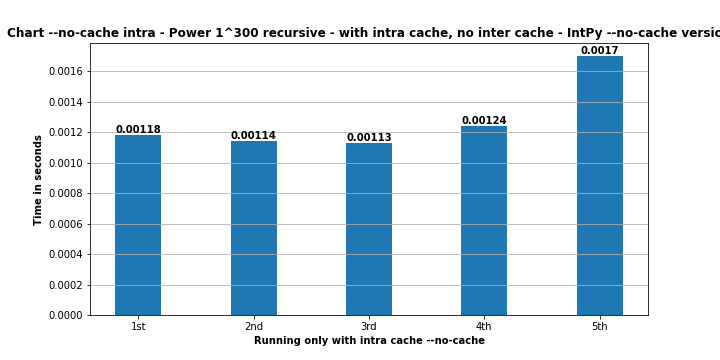

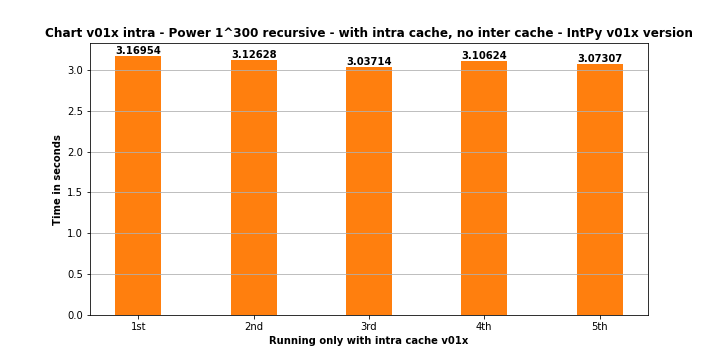

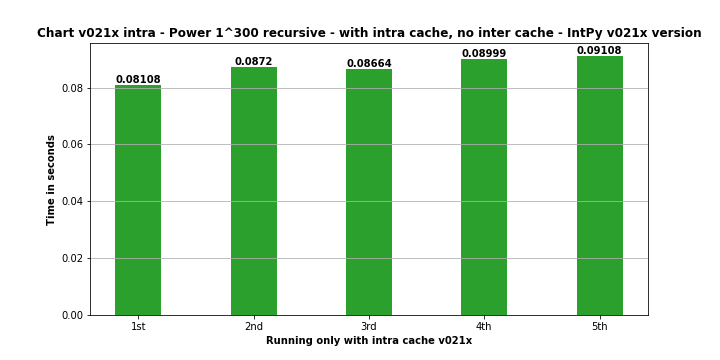

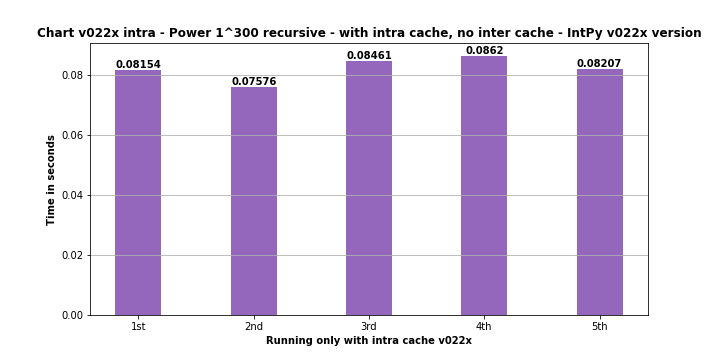

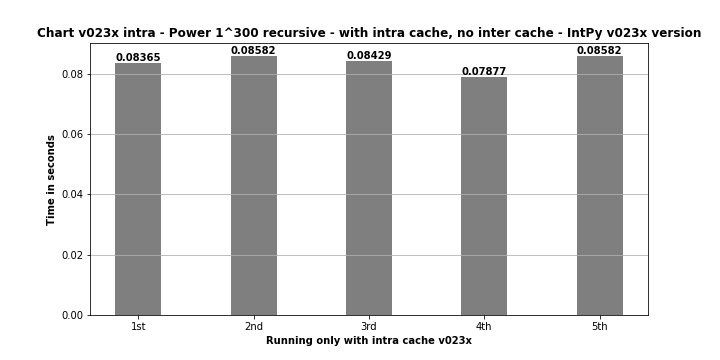

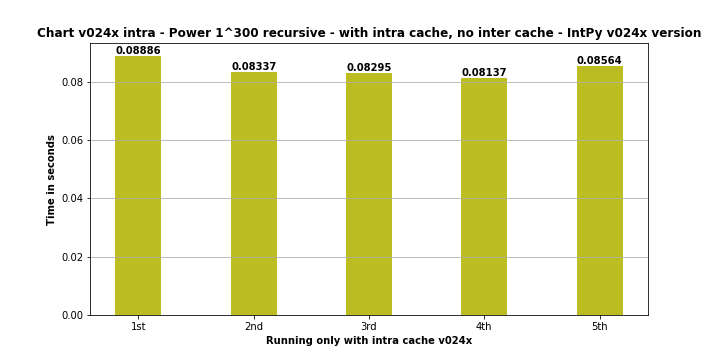

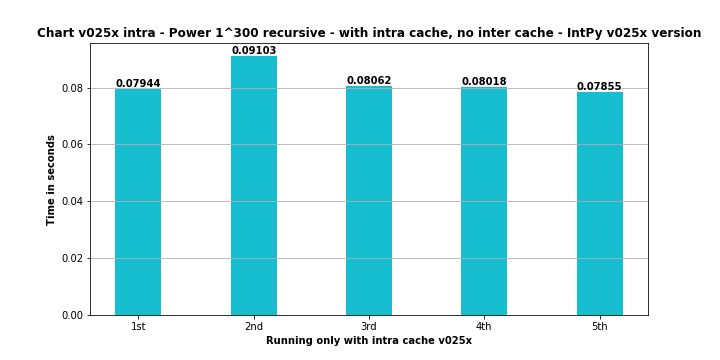

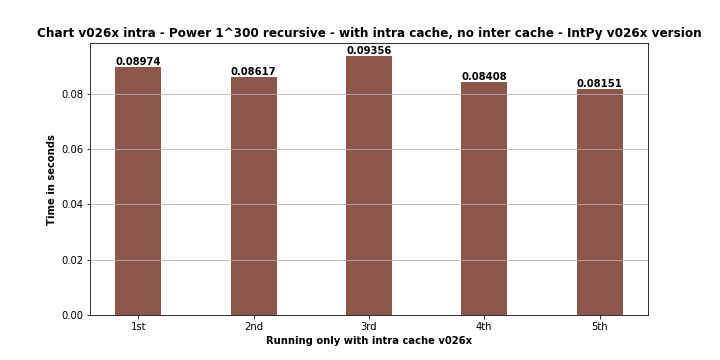

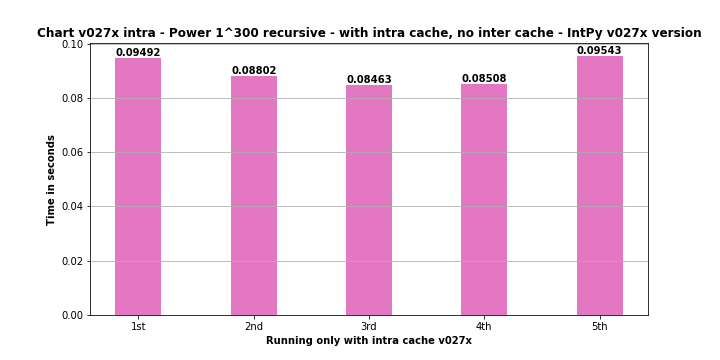

In [23]:
versions = ['--no-cache', 'v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']

from IPython.display import Image, display

for i in versions:
    display(Image("chart_intra_"+i+".png"))
    print("=====================================================================================")

###**1.3.2 Full cache charts -> intra and inter-cache**

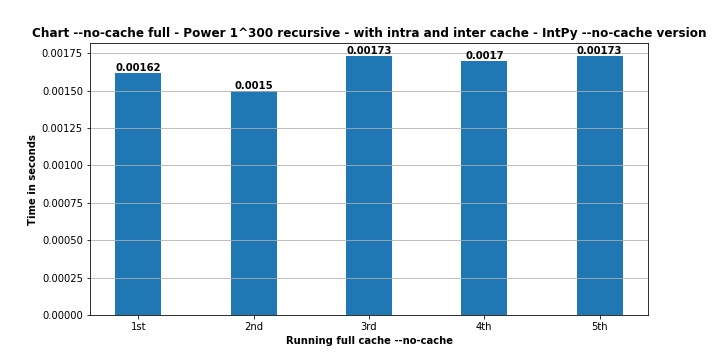

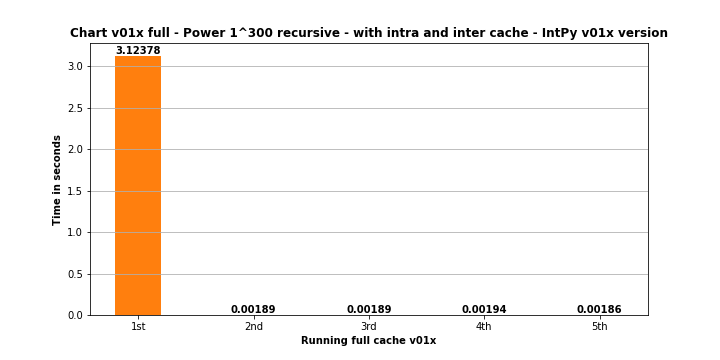

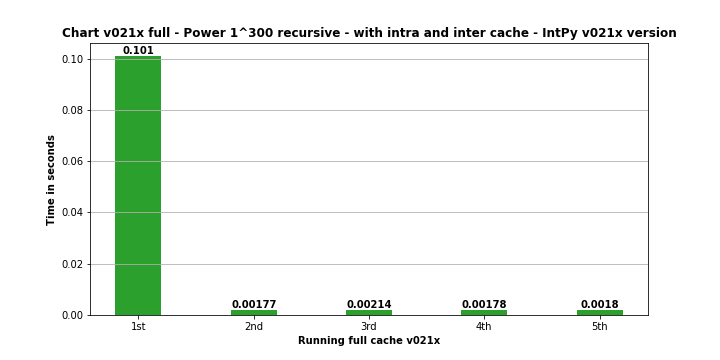

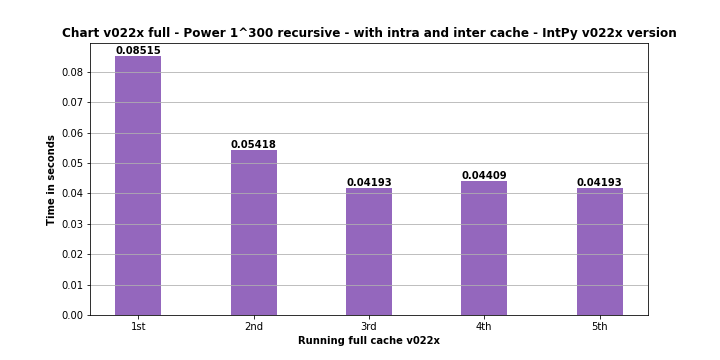

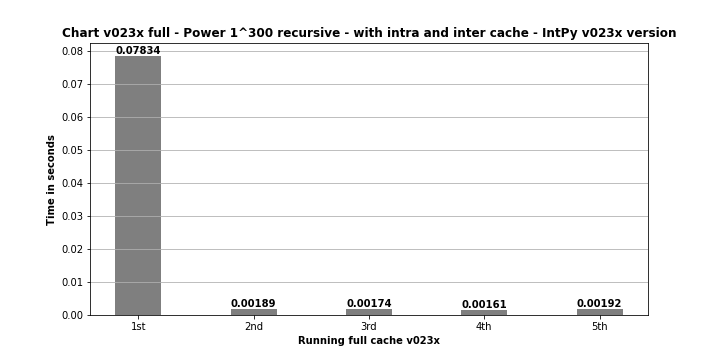

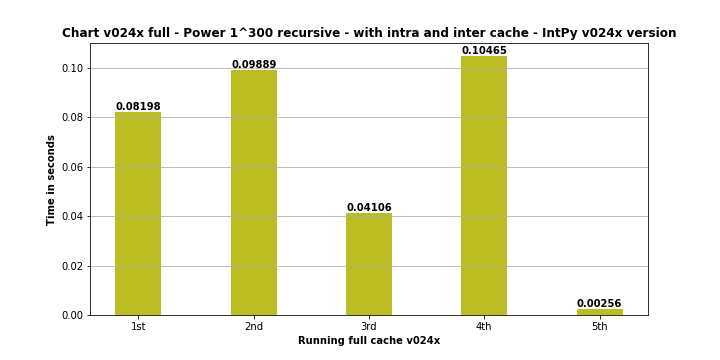

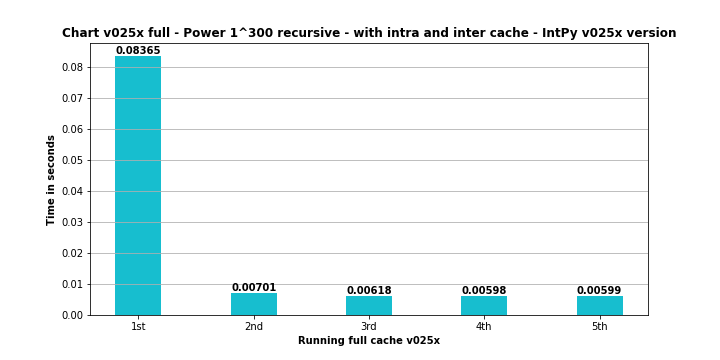

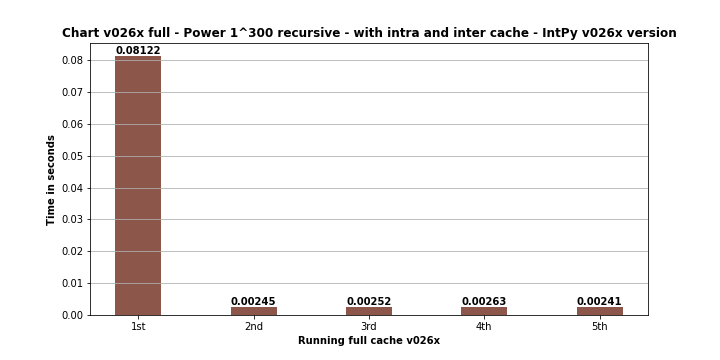

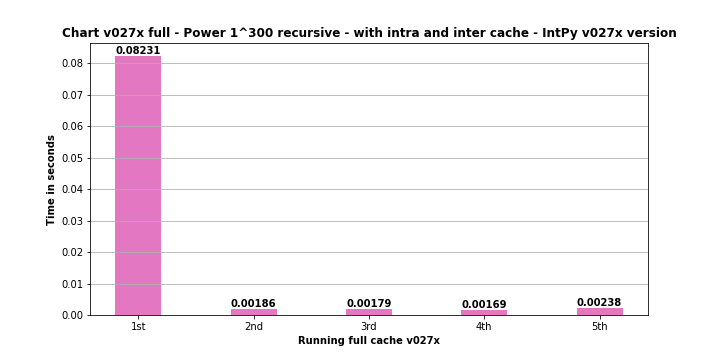

In [24]:
versions = ['--no-cache', 'v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']

from IPython.display import Image, display

for i in versions:
    display(Image("chart_full_"+i+".png"))
    print("=====================================================================================")

###**1.3.3 Only intra-cache: median comparison chart of all versions**

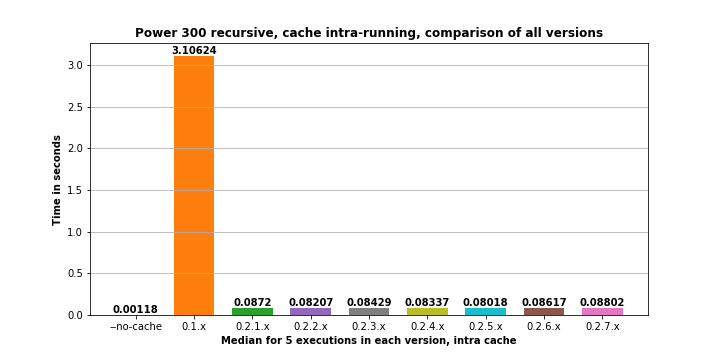

In [25]:
from IPython.display import Image, display
display(Image("compare_median_intra.png"))

###**1.3.4 Full cache -> intra and inter-cache: median comparison chart of all versions**

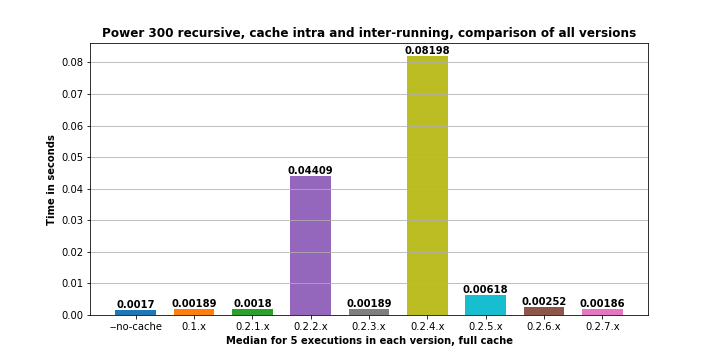

In [26]:
from IPython.display import Image, display
display(Image("compare_median_full.png"))